### House Prices - Advanced Regression Techniques

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Split arrays into random train and test subsets
from sklearn.model_selection import train_test_split

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


pd.set_option("display.max_rows", None)

### Data Acquisition

In [15]:
df_train = pd.read_csv("/home/felipe/Documents/tier0/kaggle/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("/home/felipe/Documents/tier0/kaggle/house-prices-advanced-regression-techniques/test.csv")


### Data Cleaning

In [16]:
df_train = df_train.convert_dtypes()
df_test = df_test.convert_dtypes()

df_train = df_train.drop(['Id'], axis=1)
df_test = df_test.drop(['Id'], axis=1)

print(df_train.tail(), df_test.tail())

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455          60       RL           62     7917   Pave  <NA>      Reg   
1456          20       RL           85    13175   Pave  <NA>      Reg   
1457          70       RL           66     9042   Pave  <NA>      Reg   
1458          20       RL           68     9717   Pave  <NA>      Reg   
1459          20       RL           75     9937   Pave  <NA>      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
1455         Lvl    AllPub    Inside  ...        0   <NA>   <NA>        <NA>   
1456         Lvl    AllPub    Inside  ...        0   <NA>  MnPrv        <NA>   
1457         Lvl    AllPub    Inside  ...        0   <NA>  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0   <NA>   <NA>        <NA>   
1459         Lvl    AllPub    Inside  ...        0   <NA>   <NA>        <NA>   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1455       0  

### Check out the size of the data

In [17]:
print(df_train.shape)
print(df_test.shape)

(1460, 80)
(1459, 79)


### EDA (Exploratory Data Analysis)

##### Train

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

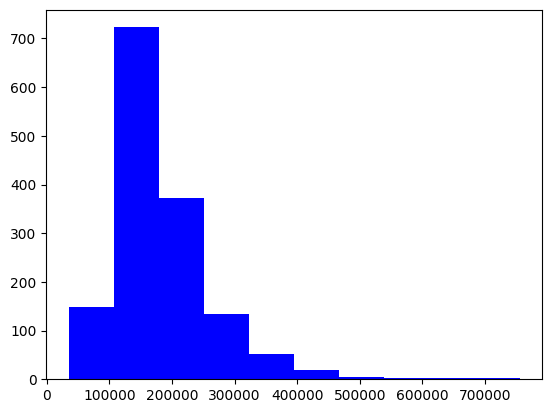

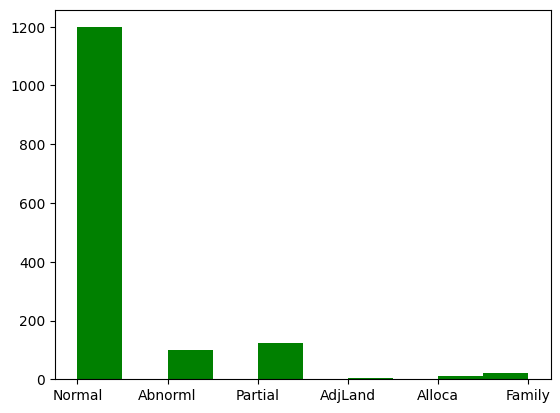

19


In [32]:
print(df_train.columns)
print(df_train.info())
print(df_train.isnull().sum().sort_values(ascending=False))

print(f"Skew: {df_train['SalePrice'].skew()}")
plt.hist(df_train["SalePrice"], color="blue")
plt.show()

plt.hist(df_train["SaleCondition"], color="green")
plt.show()

# Check if the all of the columns have 0 null values
print(sum(df_train.isnull().sum() != 0))

##### Test

In [31]:
print(df_test.columns)
print(df_test.info())
print(df_test.isnull().sum().sort_values(ascending=False))

# Check if the all of the columns have 0 null values
print(sum(df_test.isnull().sum() != 0))

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

#### Data Preprocessing
#### One-Hot Encoding

In [28]:
def encode(x): return 1 if x == "Partial" else 0
df_train["encode_condition"] = df_train["SaleCondition"].apply(encode)
df_test["encode_condition"] = df_train["SaleCondition"].apply(encode)

#### Missing values

In [30]:
data = df_train.select_dtypes(include=[np.number]).interpolate().dropna()

ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got linear

#### Model

In [29]:
X = df_train.drop("SalePrice", axis=1)
y = df_train["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create an instance of LinearRegression
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_prediction = lr.predict(X_test)

# Print the predictions
print("Predictions:", y_prediction)

# Print the metrics
print("mean_absolute_error:", mean_absolute_error(y_test, y_prediction))
print("mean_squared_error:", mean_squared_error(y_test, y_prediction))

ValueError: could not convert string to float: 'RL'